The idea of this notebook is to plot the annotations per TR
We were concerned that the background annotations has more keywords compared to other annotations, such as actions or agents
Therefore, we utilize scipy.pdist in order to look at the dissimilarity matrix of annotations

This directions was based off of our July 29th meeting

## personal note for Heejung
Make sure to mount data in the right directory

# libraries

In [67]:
import scipy
import numpy as np
import os
import pandas as pd
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import scipy.spatial
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# change as you need to
mount_dir = '/Users/h/Documents/projects_local/cluster_projects'

In [78]:
background = pd.DataFrame(np.load(os.path.join(mount_dir, 'bg.npy')))
actions    = pd.DataFrame(np.load(os.path.join(mount_dir, 'actions.npy')))
animals    = pd.DataFrame(np.load(os.path.join(mount_dir, 'animals.npy')))
body_parts = pd.DataFrame(np.load(os.path.join(mount_dir, 'body_parts.npy')))
faces      = pd.DataFrame(np.load(os.path.join(mount_dir, 'faces.npy')))
objects    = pd.DataFrame(np.load(os.path.join(mount_dir, 'objects.npy')))
places     = pd.DataFrame(np.load(os.path.join(mount_dir, 'places.npy')))
all_annot  = pd.DataFrame(np.load(os.path.join(mount_dir, 'all.npy')))


In [ ]:
references : https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

# To Do
1. convert numpy as pandas
2. stack pandas
3. calculate distance per group
4. heat map

In [80]:
bg_pdist         = pdist(background)
actions_pdist    = pdist(actions)
animals_pdist    = pdist(animals)
body_parts_pdist = pdist(body_parts)
faces_pdist      = pdist(faces)
objects_pdist    = pdist(objects)
places_pdist     = pdist(places)
all_annot_pdist  = pdist(all_annot)

In [88]:
bg_pdist.shape # 1470*1469/2

(1079715,)

# pdist
Pairwise distances between observations in n-dimensional space.
* X: ndarray
An *m* by *n* array of *m* original observations in an *n*-dimensional space.

* Y: ndarray
Returns a condensed distance matrix Y. For each *i* and *j* (where i < j < m ),where m is the number of original observations. The metric dist(u=X[i], v=X[j]) is computed and stored in entry *ij*.

In [81]:
annotations_list = ['background', 'actions', 'animals', 'body parts', 'faces', 'objects', 'places', 'all_annot']

pdist_pairwise = pd.DataFrame(squareform(pdist(np.vstack([bg_pdist,
                            actions_pdist,
                            animals_pdist,
                            body_parts_pdist,
                            faces_pdist, 
                            objects_pdist,
                            places_pdist,
                            all_annot_pdist
                           ]))),
          columns = annotations_list,
           index = annotations_list)

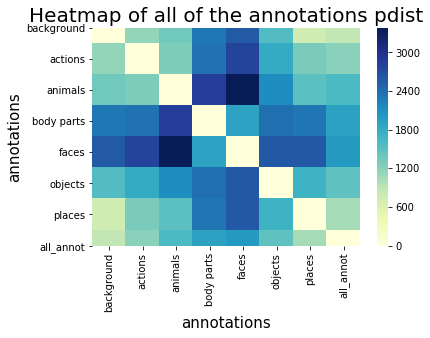

In [85]:

ax = sns.heatmap(pdist_pairwise, cmap="YlGnBu")
plt.title('Heatmap of all of the annotations pdist', fontsize = 20) # title with fontsize 20
plt.xlabel('annotations', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('annotations', fontsize = 15) # y-axis label with fontsize 15
plt.show()

# cdist

Compute distance between each pair of the two collections of inputs.

* XA: ndarray
An *mA* by *n* array of *mA* original observations in an *n*-dimensional space. Inputs are converted to float type.

* XB: ndarray
An *mB* by *n* array of *mB* original observations in an *n*-dimensional space. Inputs are converted to float type.

* Y: ndarray
A *mA* by *mB* distance matrix is returned. For each *i* and *j*, the metric dist(u=XA[i], v=XB[j]) is computed and stored in the *ij*th entry.

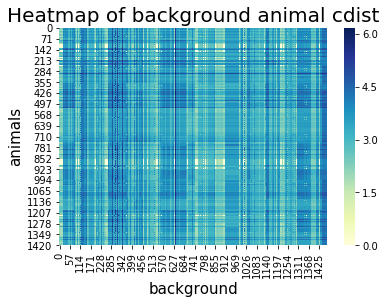

In [74]:
bg_animal_cdist = scipy.spatial.distance.cdist(background,animals )
ax = sns.heatmap(bg_animal_cdist, cmap="YlGnBu")
plt.title('Heatmap of background animal cdist', fontsize = 20) # title with fontsize 20
plt.xlabel('background', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('animals', fontsize = 15) # y-axis label with fontsize 15
plt.show()

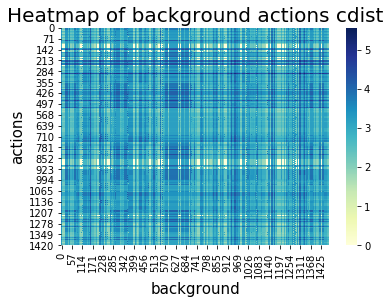

In [75]:
bg_actions_cdist = scipy.spatial.distance.cdist(background,actions )
ax = sns.heatmap(bg_actions_cdist, cmap="YlGnBu")
plt.title('Heatmap of background actions cdist', fontsize = 20) # title with fontsize 20
plt.xlabel('background', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('actions', fontsize = 15) # y-axis label with fontsize 15
plt.show()

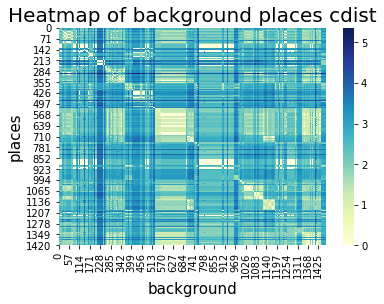

In [93]:
bg_pl_cdist = scipy.spatial.distance.cdist(background,places )
ax = sns.heatmap(bg_pl_cdist, cmap="YlGnBu")
plt.title('Heatmap of background places cdist', fontsize = 20) # title with fontsize 20
plt.xlabel('background', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('places', fontsize = 15) # y-axis label with fontsize 15
plt.show()

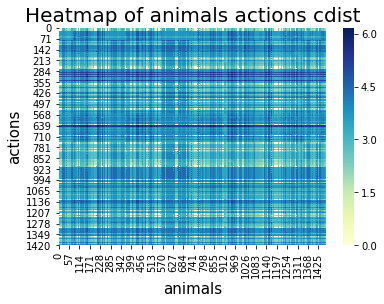

In [76]:
animals_actions_cdist = scipy.spatial.distance.cdist(animals,actions )
ax = sns.heatmap(animals_actions_cdist, cmap="YlGnBu")
plt.title('Heatmap of animals actions cdist', fontsize = 20) # title with fontsize 20
plt.xlabel('animals', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('actions', fontsize = 15) # y-axis label with fontsize 15
plt.show()

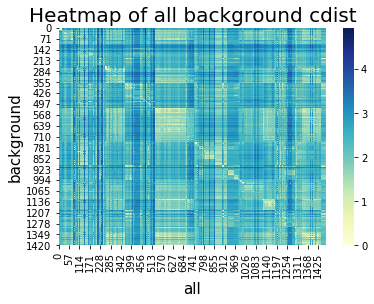

In [79]:
all_bg_cdist = scipy.spatial.distance.cdist(all_annot,background )
ax = sns.heatmap(all_bg_cdist, cmap="YlGnBu")
plt.title('Heatmap of all background cdist', fontsize = 20) # title with fontsize 20
plt.xlabel('all', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('background', fontsize = 15) # y-axis label with fontsize 15
plt.show()